# Deteksi Oulier Menggunakan Metode LOF

## **1. Apa itu Local Outlier Factor (LOF)?**  
Local Outlier Factor (LOF) adalah algoritma berbasis kepadatan (*density-based*) yang digunakan untuk mendeteksi **outlier** dalam suatu dataset. Algoritma ini membandingkan **kepadatan lokal** suatu titik data dengan kepadatan lokal tetangganya. Jika suatu titik memiliki kepadatan yang jauh lebih rendah dibandingkan dengan tetangganya, maka titik tersebut dianggap sebagai **outlier**.  

LOF diperkenalkan oleh **Breunig dkk. (2000)** dan sering digunakan dalam deteksi anomali karena mampu menangani distribusi data yang kompleks tanpa asumsi bahwa data harus mengikuti distribusi normal.

---

## **2. Konsep Dasar LOF**  
LOF bekerja dengan membandingkan kepadatan lokal suatu titik dengan kepadatan lokal dari titik-titik terdekatnya. Berikut adalah langkah-langkah utama dalam LOF:

### **a. Menentukan Tetangga Terdekat (*k-nearest neighbors*)**  
- Untuk setiap titik dalam dataset, cari **k tetangga terdekat** berdasarkan jarak (misalnya, Euclidean distance).  
- Parameter `$n\_neighbors$` menentukan jumlah tetangga yang digunakan dalam perhitungan.

### **b. Menghitung Jarak Jangkauan (*Reachability Distance*)**  
Jarak jangkauan dari titik $A$ ke titik $B$ didefinisikan sebagai:  

$$
\text{reachability\_distance}(A, B) = \max(d_k(B), d(A, B))
$$

di mana:  
- $d_k(B)$ adalah jarak dari titik $B$ ke tetangga ke-$k$ terdekatnya.  
- $d(A, B)$ adalah jarak langsung dari $A$ ke $B$.  

Jarak ini digunakan untuk menghindari efek titik-titik yang terlalu dekat dengan satu sama lain.

### **c. Menghitung Kepadatan Lokal (*Local Reachability Density - LRD*)**  
Kepadatan jangkauan lokal (*Local Reachability Density - LRD*) dari suatu titik $A$ dihitung sebagai kebalikan dari rata-rata jarak jangkauan dari titik $A$ ke semua tetangganya:

$$
LRD(A) = \frac{1}{\frac{1}{|kNN(A)|} \sum_{B \in kNN(A)} \text{reachability\_distance}(A, B)}
$$

Semakin kecil nilai **LRD**, semakin jarang titik itu berada dalam suatu kelompok.

### **d. Menghitung LOF Score**  
Local Outlier Factor (LOF) dihitung sebagai rasio rata-rata kepadatan tetangga dengan kepadatan titik itu sendiri:

$$
LOF(A) = \frac{1}{|kNN(A)|} \sum_{B \in kNN(A)} \frac{LRD(B)}{LRD(A)}
$$

di mana:
- Jika $LOF \approx 1$, maka titik tersebut memiliki kepadatan yang mirip dengan tetangganya (**bukan outlier**).
- Jika $LOF \gg 1$, maka titik tersebut memiliki kepadatan jauh lebih rendah dibandingkan dengan tetangganya (**outlier**).

---

## Mendeteksi Data Secara Manual

### Import Library

In [4]:
import pandas as pd
from tabulate import tabulate

### Mengambil data dari Local Enviroment

In [5]:
from google.colab import files

# Upload file secara manual
uploaded = files.upload()

Saving deteksi_outlier.xlsx to deteksi_outlier (1).xlsx


In [6]:
file_path = "deteksi_outlier.xlsx"
df = pd.read_excel(file_path, sheet_name="Data", engine="openpyxl")
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+-------+------------+------+------+
|    |   No. | Variabel   |   X1 |   X2 |
+====+=======+============+======+======+
|  0 |     1 | A          |    1 |    4 |
+----+-------+------------+------+------+
|  1 |     2 | B          |    3 |    4 |
+----+-------+------------+------+------+
|  2 |     3 | C          |    2 |    3 |
+----+-------+------------+------+------+
|  3 |     4 | D          |    4 |    5 |
+----+-------+------------+------+------+
|  4 |     5 | E          |   20 |   29 |
+----+-------+------------+------+------+
|  5 |     6 | F          |    3 |    7 |
+----+-------+------------+------+------+
|  6 |     7 | G          |    1 |    3 |
+----+-------+------------+------+------+
|  7 |     8 | H          |    2 |    5 |
+----+-------+------------+------+------+
|  8 |     9 | I          |    6 |    8 |
+----+-------+------------+------+------+
|  9 |    10 | J          |   50 |   69 |
+----+-------+------------+------+------+


### Menghitung Jarak Menggunakan Encludian Distance

Hitung jarak setiap titik dengan titik lainnya yang nantinya digunakan untuk menghitung RD (Reachable Distance).

**Rumus Euclidean Distance**

Jarak Euclidean antara dua titik \( (x_1, y_1) \) dan \( (x_2, y_2) \) dihitung dengan rumus:

$$
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$



In [7]:
file_path = "deteksi_outlier.xlsx"
df = pd.read_excel(file_path, sheet_name="Encludian Distance", engine="openpyxl")
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+---------+----------+----------+----------+----------+---------+----------+----------+----------+----------+---------+
|    | Titik   |        A |        B |        C |        D |       E |        F |        G |        H |        I |       J |
+====+=========+==========+==========+==========+==========+=========+==========+==========+==========+==========+=========+
|  0 | A       |  0       |  2       |  1.41421 |  3.16228 | 31.4006 |  3.60555 |  1       |  1.41421 |  6.40312 | 81.4002 |
+----+---------+----------+----------+----------+----------+---------+----------+----------+----------+----------+---------+
|  1 | B       |  2       |  0       |  1.41421 |  1.41421 | 30.2324 |  3       |  2.23607 |  1.41421 |  5       | 80.2122 |
+----+---------+----------+----------+----------+----------+---------+----------+----------+----------+----------+---------+
|  2 | C       |  1.41421 |  1.41421 |  0       |  2.82843 | 31.6228 |  4.12311 |  1       |  2       |  6.40312 | 81.6088 |


Kemudian kelompokkan masing-masing titik dan urutkan dari terkecil ke terbesar sebelum sampling menggunakan k-terdekat.

In [8]:
file_path = "deteksi_outlier.xlsx"
df = pd.read_excel(file_path, sheet_name="Sort Jarak", engine="openpyxl")
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+----------------+-------------+
|    | Hasil Sort A   | Encludian   |
+====+================+=============+
|  0 | (A,G)          | 1           |
+----+----------------+-------------+
|  1 | (A,C)          | 1.41        |
+----+----------------+-------------+
|  2 | (A,H)          | 1.41        |
+----+----------------+-------------+
|  3 | (A,B)          | 2           |
+----+----------------+-------------+
|  4 | (A,D)          | 3.16        |
+----+----------------+-------------+
|  5 | (A,F)          | 3.61        |
+----+----------------+-------------+
|  6 | (A,I)          | 6.4         |
+----+----------------+-------------+
|  7 | (A,E)          | 31.4        |
+----+----------------+-------------+
|  8 | (A,J)          | 81.4        |
+----+----------------+-------------+
|  9 | Hasil Sort B   | Encludian   |
+----+----------------+-------------+
| 10 | (B,C)          | 1.41        |
+----+----------------+-------------+
| 11 | (B,D)          | 1.41        |
+----+------

Ambil data yang telah diurutkan pada setiap kelompok titik berdasarkan nilai k-nya yakni 3 data.

In [9]:
file_path = "deteksi_outlier.xlsx"
df = pd.read_excel(file_path, sheet_name="k", engine="openpyxl")
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+------------------------+-------------+
|    | Hasil Sampling k=3 A   | Encludian   |
+====+========================+=============+
|  0 | (A,G)                  | 1           |
+----+------------------------+-------------+
|  1 | (A,C)                  | 1.41        |
+----+------------------------+-------------+
|  2 | (A,H)                  | 1.41        |
+----+------------------------+-------------+
|  3 | Hasil Sampling k=3  B  | Encludian   |
+----+------------------------+-------------+
|  4 | (B,C)                  | 1.41        |
+----+------------------------+-------------+
|  5 | (B,D)                  | 1.41        |
+----+------------------------+-------------+
|  6 | (B,H)                  | 1.41        |
+----+------------------------+-------------+
|  7 | Hasil Sampling k=3  C  | Encludian   |
+----+------------------------+-------------+
|  8 | (C,G)                  | 1           |
+----+------------------------+-------------+
|  9 | (C,A)                  | 1.

##

### Menghitung Nilai Reachable Distance (RD)

Untuk mencari nilai RD, bandingkan nilai terbesar dari k-distance dengan distance. Nilai k-distance didapat dari nilai urutan ke-k dari titik tetangga. Sedangkan nilai distance didapat dari nilai jarak dari titik ke tetangga. Kemudian cari nilai yang paling maksimal.

In [10]:
file_path = "deteksi_outlier.xlsx"
df = pd.read_excel(file_path, sheet_name="RD", engine="openpyxl")
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+-------------+--------------+------------+------------+
|    | tetangga    |   k-distance |   distance |   RD = max |
+====+=============+==============+============+============+
|  0 | (A,G)       |         2.24 |       1    |       2.24 |
+----+-------------+--------------+------------+------------+
|  1 | (A,C)       |         1.41 |       1.41 |       1.41 |
+----+-------------+--------------+------------+------------+
|  2 | (A,H)       |         2    |       1.41 |       2    |
+----+-------------+--------------+------------+------------+
|  3 | (B,C)       |         1.41 |       1.41 |       1.41 |
+----+-------------+--------------+------------+------------+
|  4 | (B,D)       |         2.24 |       1.41 |       2.24 |
+----+-------------+--------------+------------+------------+
|  5 | (B,H)       |         2    |       1.41 |       2    |
+----+-------------+--------------+------------+------------+
|  6 | (C,G)       |         2.24 |       1    |       2.24 |
+----+--

### Menghitung Nilai Local Reachbility Density (LRD)

Jumlahkan nilai RD pada setiap tetangga titik kemudian bagi dengan nilai k-nya yakni 3.

In [11]:
file_path = "deteksi_outlier.xlsx"
df = pd.read_excel(file_path, sheet_name="LRD", engine="openpyxl")
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+---------+------------+--------------------------------+--------------------+
|    | titik   | tetangga   | Σ RD_k(P, O)                   | LRD(P)             |
+====+=========+============+================================+====================+
|  0 | A       | G,C,H      | 2,24 + 1,41+ 2,00 = 5,65       | 3 / 5,65 = 0.53    |
+----+---------+------------+--------------------------------+--------------------+
|  1 | B       | C,D,H      | 1,41 + 2,24 + 2,00 = 5,65      | 3 / 5,65 = 0.53    |
+----+---------+------------+--------------------------------+--------------------+
|  2 | C       | G,A,B      | 2,24 + 1,41 + 1,41 = 5.06      | 3 / 5.06 = 0.6     |
+----+---------+------------+--------------------------------+--------------------+
|  3 | D       | B,H,F      | 1,41 + 2,00 + 3,00 = 6,41      | 3 / 6,41 = 0,46    |
+----+---------+------------+--------------------------------+--------------------+
|  4 | E       | I,F,D      | 25,24 + 27,80 + 28,84 = 81,88  | 3 / 81,88 = 0

### Menghitung Nilai Local Outlier Factor (LOF)

Mencari nilai LOF dengan cara mengambil nilai LRD pada setiap tetangga yang dibagi dengan nilai LRD titik, kemudian jumlahkan setelah proses bagi. Langkah selanjutnya bagi dengan nilai k yakni 3.

In [12]:
file_path = "deteksi_outlier.xlsx"
df = pd.read_excel(file_path, sheet_name="LOF", engine="openpyxl")
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+---------+------------+-------------------------------------------------+------------------------------------+
|    | titik   | tetangga   | rumus                                           | LOF                                |
+====+=========+============+=================================================+====================================+
|  0 | A       | G,C,H      | (0,6/0,53) + (0,6/0,53) + (0,62/0,53) /3        | (1,13 + 1,13 + 1,16) / 3 = 1.14    |
+----+---------+------------+-------------------------------------------------+------------------------------------+
|  1 | B       | C,D,H      | (0,6/0,53) + (0,46/0,53) + (0,62/0,53) /3       | (1,13 + 0.86 + 1,16) / 3 = 1.05    |
+----+---------+------------+-------------------------------------------------+------------------------------------+
|  2 | C       | G,A,B      | (0,6/0,6) + (0,53/0,6) + (0,53/0,6) /3          | (1 + 0,88 + 0,88) / 3 = 0.92       |
+----+---------+------------+-----------------------------------

Berdasarkan perhitungan di atas ditemukan dua titik yang Oulier yakni titik E dan J karena berada jauh dengan nilai 1 yang merepresentasikan nilai normal.

## Mendeteksi Data Outlier Menggunakan Library sklearn.neighbors

In [13]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

file_path = "deteksi_outlier.xlsx"
df = pd.read_excel(file_path, sheet_name="Data", engine="openpyxl")

feature_column = ['X1', 'X2']
if all(col in df.columns for col in feature_column):
    X = df[feature_column].values
else:
    raise ValueError("Kolom 'X1' atau 'X2' tidak ditemukan dalam dataset!")

n_samples = len(X)
ground_truth = np.ones(n_samples, dtype=int)

clf = LocalOutlierFactor(n_neighbors=3, contamination=0.2)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

print("Prediksi Outlier:", y_pred)
print("Hasil Perhitungan Outlier:", X_scores)

Prediksi Outlier: [ 1  1  1  1 -1  1  1  1  1 -1]
Hasil Perhitungan Outlier: [ -1.13384742  -1.05559236  -0.9308841   -1.10734909 -10.22790021
  -1.34496671  -0.9308841   -0.88749341  -1.83074716 -15.63344011]


Dari perhitungan menggunakan library tersebut dapat disimpulkan bahwa nilai -1 merepresentasikan data outliernya. Kemudian untuk nilai outliernya sebesar -10.22790021 dan -15.63344011 yakni pada titik E dan J.

### Visualisasi Data Menggunakan Scatter Plot

Text(0.5, 1.0, 'Deteksi Outlier dengan LOF')

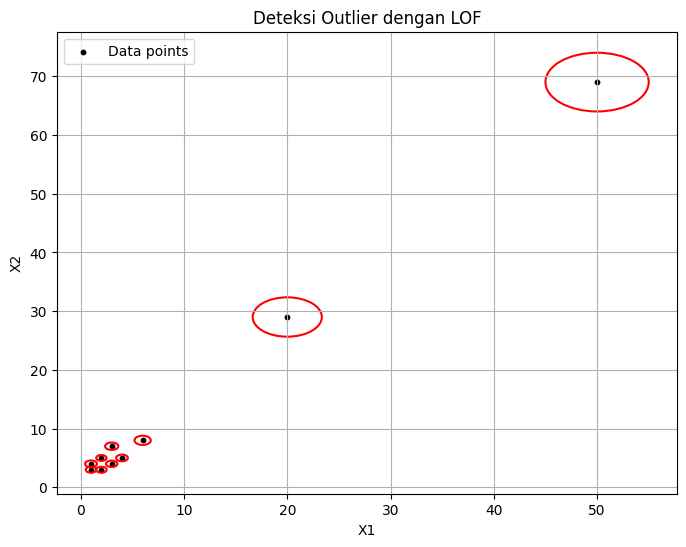

In [14]:
import matplotlib.pyplot as plt

max_radius = 5
min_radius = 0.5

radius = min_radius + (max_radius - min_radius) * (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='black', s=10, label="Data points")

for i in range(len(X)):
    circle = plt.Circle((X[i, 0], X[i, 1]), radius[i], color='red', fill=False, linewidth=1.5)
    plt.gca().add_patch(circle)

# Konfigurasi plot
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.title('Deteksi Outlier dengan LOF')